In [1]:
%pylab inline
%config InlineBackend.figure_format='svg'
import os, multiprocessing
import iscat.preprocessor
import iscat.analyser
from iscat.utils.event import Events
import os
import csv
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iSCAMS_class import iSCAMS
from astroML.plotting import hist
import seaborn as sns
from astroML.density_estimation import knuth_bin_width

Populating the interactive namespace from numpy and matplotlib


C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
directory = 'C:/CH/Charlie/2018/May/22/DRP1 - 250 nM GMP-PCP_0/cam1/'
overwrite_existing_output = True

In [28]:
# Files to be analysed
filenames_data = [os.path.join(directory, fn) for fn in os.listdir(directory) if fn.endswith('.tdms')]
assert len(filenames_data) > 0, 'Cannot find any TDMS files to process in current directory'

# Generate output filenames
filenames_peaks_root  = [os.path.join(directory, '%s_peaks' % fn[:-len('.tdms')]) for fn in filenames_data]

if not overwrite_existing_output:
    # Make sure that none of the output files already exists
    for fn in (filenames_peaks_found+filenames_peaks_fitted):
        assert not os.path.exists(fn), 'Output filename (%s) already exists' % fn

INFO:iscat.utils.event:	Reading events from C:\CH\Charlie\2018\May\22\DRP1 - 250 nM GMP-PCP_0\cam1\event0_peaks_fitted.h5
Optimization terminated successfully.
         Current function value: -47325.082089
         Iterations: 18
         Function evaluations: 49
INFO:iscat.utils.event:	Reading events from C:\CH\Charlie\2018\May\22\DRP1 - 250 nM GMP-PCP_0\cam1\event1_peaks_fitted.h5
Optimization terminated successfully.
         Current function value: -41107.679227
         Iterations: 19
         Function evaluations: 52
INFO:iscat.utils.event:	Reading events from C:\CH\Charlie\2018\May\22\DRP1 - 250 nM GMP-PCP_0\cam1\event2_peaks_fitted.h5
Optimization terminated successfully.
         Current function value: -50071.788311
         Iterations: 20
         Function evaluations: 53


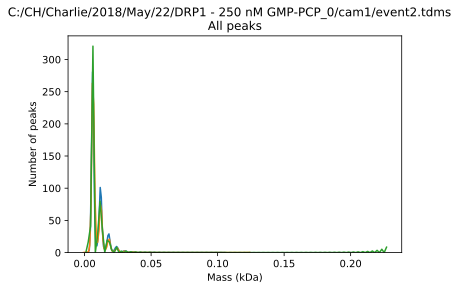

[0.01007899 0.00581742 0.00584754 ... 0.00591775 0.00586459 0.0060351 ]
Optimization terminated successfully.
         Current function value: -163455.970194
         Iterations: 22
         Function evaluations: 59


C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


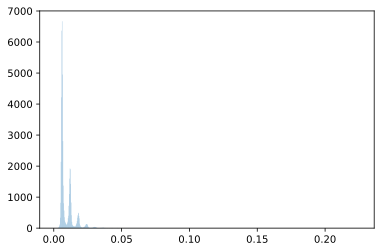

In [32]:
figure()
Sum_C = []
for filename_data, filename_peaks_root in zip(filenames_data[:], filenames_peaks_root[:]):
    
    events_fitted = Events()
    events_fitted.read_h5(f'{filename_peaks_root}_fitted.h5')
    #subplot(121)
    suptitle(filename_data)
    
    title('All peaks')
    C = events_fitted.get_C()
    #C = abs(C)
    C = C[(C >= 0)]# & (C < 0.05)]
    #C = C*35391.07779344886 - 20.367476979303245
    Sum_C.append(C)
    dx, bins = knuth_bin_width(C, return_bins=True)
    sns.distplot(C, len(bins),hist=False)
    
    ylabel('Number of peaks')
    xlabel('Mass (kDa)')
    #xlim((0,1000))
    
    savefig(f'{filename_peaks_root}_fig.svg', format="svg")

    #subplot(122)
    #title('Only low noise peaks')
    #C = (events_fitted.get_C())[events_fitted.get_G()]
    #C = C[(C >= 0) & (C < 0.05)]
    #dx, bins = knuth_bin_width(C, return_bins=True)
    #sns.distplot(C, len(bins))
    
    #ylabel('Number of peaks')
    #xlabel('Interferometeric contrast')
        
show()
Sum_C = array(Sum_C)
Sum_C = hstack(Sum_C)
print(Sum_C[:])
figure()
dx, bins = knuth_bin_width(Sum_C[:], return_bins=True)
sns.distplot(Sum_C[:], len(bins),kde=False)
#xlim((0,1500))
#ylim((0,200))
#savefig("C:/Users/pkgroup/OneDrive - Nexus365/Figures/DRP1_250nM.svg")
show()

In [33]:
DRP = iSCAMS(Sum_C,Conc="250nM",Protein="DRP1",Buffer="HEPES",Mass=True,m=39391.07779344886,b= - 20.367476979303245)

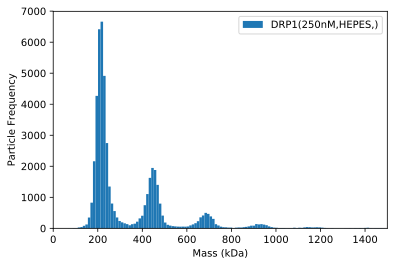

[376.65474811 208.78678444 209.9733406  ... 212.73911086 210.64512093
 217.36165793]


In [34]:
DRP.Plot_hist()
print(DRP.mass_data)

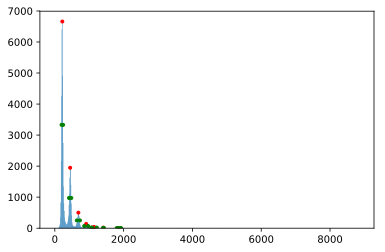

C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


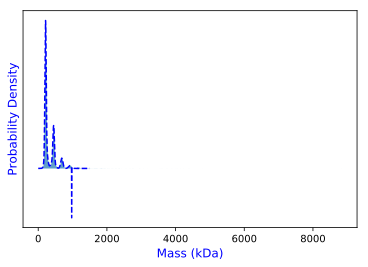

In [35]:
DRP.Auto_Gauss()
DRP.Fit_Gaussian()

Optimization terminated successfully.
         Current function value: -163455.970194
         Iterations: 22
         Function evaluations: 59


C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


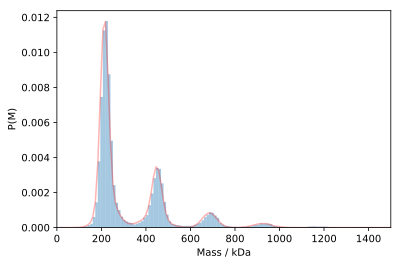

[376.65474811 208.78678444 209.9733406  ... 212.73911086 210.64512093
 217.36165793]
[ 2.13319377e+02  1.05534538e-02  2.55103894e+01  4.49161124e+02
  2.94333010e-03  3.03720775e+01  6.85565111e+02  8.34285448e-04
  4.63283344e+01  9.25846991e+02  2.30288705e-04 -6.03415577e+01
  2.29320770e+02  1.63658796e-03  5.86050821e+01  9.74793704e+02
 -4.14693479e-03  2.56647088e+00  4.29491257e+02  5.88204169e-04
  8.03051270e+01  1.83301101e+03  9.05580962e-06  2.78108191e+01
  1.91339116e+03  7.00794363e-06  9.93185196e+00]


In [37]:
def Gfunc(x, params): # Multiple Gaussian function for scipy.optimize.curve_fit
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

figure()
dx, bins = knuth_bin_width(DRP.mass_data, return_bins=True)
sns.distplot(DRP.mass_data, len(bins),norm_hist=True,kde=False)
fx = Gfunc(bins,DRP.popt)
plot(bins,fx,'r-',alpha=0.3)
xlim((0,1500))
xlabel("Mass / kDa")
ylabel("P(M)")
#ylim((0,0.0002))
#savefig("C:/Users/pkgroup/OneDrive - Nexus365/Figures/DRP1_250nM_3.svg",format='svg')
show()
print(DRP.mass_data)
print(DRP.popt)